1. Наименование темы:\
Построение рекомендательной системы на основе крупного мультимедиа-каталога

2. Цель:
*(Рекомендательные системы анализируют предпочтения пользователей и предсказывают, что может понравиться им в будущем.)*

Значит нужно построить подходящую модель машинного обучения, которая будет обучаться на выборе пользователя (контентная фильтрация), выборе пользователей со схожими интересами (коллаборативная фильтрация) и рейтинге фильмов и предлагать интерасные варианты (подходящие конкретному пользователю).
Возможно это будет несколько алгоритмов, результаты которых будут ранжироваться и смешиваться.

3. Задачи:\
1) Проанализаровать и преобразовать исходный датасет в удобный для обработки вид\
2) Разделить набор данных на обучающую и тестовую выборки.\
3) Обучить несколько моделей для решения выбранной задачи\
4) Выбрать наиболее перспективную\
5) Усовершенствовать выбранную модель


• Выгрузка данных\
Типы данных\
Выгрузка данных из хранилища

• Предобработка данных\
Фильтрация данных\
Предобработка поисковых запросов

• Обучение модели\
Параметры модели и обучение\
Оценка качества модели


4. Ожидаемые результаты :\
Для максимально большого сегмента
активных пользователей отобрать по top-N
позиций, которые пользователя наиболее
вероятно заинтересуют.



* в итоге должна получится формула по которой вычисляется вероятность интереса конкретного пользователя к конкретному фильму? и уже из этого списка выбираются пары с наибольшим значением

5. Описание датасета

5. Датасет\
https://www.kaggle.com/datasets/shivamb/netflix-shows
https://drive.google.com/file/d/1Dn1BZD3YxgBQJSIjbfNnmCFlDW2jdQGD/view

 в итоге должна получится формула по которой вычисляется вероятность интереса конкретного пользователя к конкретному фильму? и уже из этого списка выбираются пары с наибольшим значением

## Заметки

Рекомендательные системы — это комплекс сервисов и программ, который анализирует предпочтения пользователей и пытается предсказать, что может их заинтересовать.

Виды рекомендательных систем\
Рекомендации могут быть персонализированными и неперсонализированными. В первом случае мы знаем что-то о пользователе и основываемся на его предпочтениях, во втором — используем популярные или сопутствующие товары.\
???????????????

Выделяют четыре вида рекомендательных систем:\
Контентная фильтрация.\
Коллаборативная фильтрация.\
Фильтрация, основанная на знаниях.\
Гибридные рекомендательные системы.

Контентная фильтрация (content-based filtering) основывается на потребленном контенте.\
Коллаборативная фильтрация (collaborative filtering) учится на опыте других пользователей со схожими интересами.\
В системе, основанной на знаниях (knowledge-based filtering), рекомендации строятся на основе экспертного мнения. В отличие от рекомендаций в предыдущих системах они чаще всего неперсонализированные.\
В гибридной системе (hybrid filtering) все перемешано: предыдущие виды рекомендаций могут работать вместе и подключаться в разных последовательностях.

https://habr.com/ru/company/prequel/blog/567648/ \
проблемы рек систем


https://www.kaggle.com/code/morrisb/how-to-recommend-anything-deep-recommender \
примерные шаги


# Преобразование и очистка датасета

In [ ]:
import numpy as np

In [ ]:
# Подключаемся к гугл диску для загрузки данных
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
movies = pd.read_csv('/content/drive/MyDrive/Курсач/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Курсач/ratings.csv')

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [ ]:
# определяю строки, которые нужно удалить
delated = movies[movies['genres'] == '(no genres listed)']
del_mov_id = delated['movieId']
delated

,movieId,title,genres
10172,126929,Li'l Quinquin ( ),(no genres listed)
10260,135460,Pablo (2012),(no genres listed)
10280,138863,The Big Broadcast of 1936 (1935),(no genres listed)
10301,141305,Round Trip to Heaven (1992),(no genres listed)
10303,141472,The 50 Year Argument (2014),(no genres listed)
10317,143709,The Take (2009),(no genres listed)
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [ ]:
del_mov_id

10172    126929
10260    135460
10280    138863
10301    141305
10303    141472
10317    143709
10328    149532
Name: movieId, dtype: int64

In [ ]:
# Удаляю их
movies = movies[movies.genres != '(no genres listed)']

In [ ]:
# Преобразую каждую строку столбца genres в list 
genres_list = list(map(lambda x: x.split('|'), np.array(movies['genres'])))
movies['genres'] = genres_list

In [ ]:
# Разделяю столбец title на название фильма и год выпуска
title_year_list = list(map(lambda x: [x[:-7], x[-5:-1]], np.array(movies['title'])))
title_list = np.array(title_year_list)[:,0]
year_list = np.array(title_year_list)[:,1]
movies['title'] = title_list
movies['year'] = year_list

In [ ]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10322 entries, 0 to 10327
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10322 non-null  int64 
 1   title    10322 non-null  object
 2   genres   10322 non-null  object
 3   year     10322 non-null  object
dtypes: int64(1), object(3)
memory usage: 403.2+ KB


In [ ]:
movies = movies[movies.year != "    "]

In [ ]:
movies["year"] = pd.to_numeric(movies["year"])
movies.dtypes

<ipython-input-16-d11c05c8a688>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["year"] = pd.to_numeric(movies["year"])


movieId     int64
title      object
genres     object
year        int64
dtype: object

In [ ]:
movies

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995
...,...,...,...,...
10323,146656,Creed,[Drama],2015
10324,146684,Cosmic Scrat-tastrophe,"[Animation, Children, Comedy]",2015
10325,146878,Le Grand Restaurant,[Comedy],1966
10326,148238,A Very Murray Christmas,[Comedy],2015


In [ ]:
# Для того чтобы жанры учитывались, сделаем каждый жанр отдельным признаком

# Выделяю все жанры, присутствующие в датасете
from functools import reduce
genres_unique = sorted(list(set(reduce(lambda x,y: x+y, np.array(movies['genres'])))))
genres_unique
# ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
# 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


# Создаю столбцы с каждым жанром по отдельности
for g in genres_unique:
  vec = np.array([])
  for m in movies['genres']:
    if g in m:
      vec = np.append(vec, 1)
    else:
      vec = np.append(vec, 0)      
  movies[g] = vec 

In [ ]:
movies

,movieId,title,genres,year,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,146656,Creed,[Drama],2015,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10324,146684,Cosmic Scrat-tastrophe,"[Animation, Children, Comedy]",2015,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10325,146878,Le Grand Restaurant,[Comedy],1966,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10326,148238,A Very Murray Christmas,[Comedy],2015,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
movies.describe()

,movieId,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,...,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000
mean,31840.161225,1990.467106,0.168298,0.112780,0.038853,0.052321,0.340471,0.139521,0.040209,0.505668,...,0.018894,0.096987,0.014727,0.039628,0.065401,0.173239,0.083325,0.211898,0.048736,0.022769
std,37627.703775,20.837534,0.374149,0.316339,0.193253,0.222683,0.473891,0.346507,0.196459,0.499992,...,0.136156,0.295954,0.120465,0.195093,0.247243,0.378472,0.276387,0.408673,0.215325,0.149174
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3235.000000,1982.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7084.000000,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59738.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,148626.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [ ]:
# Удаляем из датафрэйма ratings отзывы с теми фильмами, которых нет в movies
ratings = ratings[~ratings['movieId'].isin(del_mov_id)]

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [ ]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [ ]:
ratings_values = sorted(ratings['rating'].unique())
ratings_values

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [ ]:
# Добавляю столбец с количеством просмотров каждого фильма 
m_count = ratings.movieId.value_counts()
views = []
for m in movies.movieId:
  if m in m_count.index:
    views = np.append(views, m_count[m])
  else:
    views = np.append(views, 0)    
movies['views'] = views

In [ ]:
# Добавляю столбец со средним рейтингом фильмов
mean_rat = ratings[['movieId', 'rating']].groupby('movieId').mean()
mr = []
for m in movies.movieId:
  if m in mean_rat.index:
    mr = np.append(mr, mean_rat.loc[m])
  else:
    mr = np.append(mr, 0)    
movies['mean_rating'] = mr

In [ ]:
movies

,movieId,title,genres,year,Action,Adventure,Animation,Children,Comedy,Crime,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,views,mean_rating
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,3.907328
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,3.353261
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.189655
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,2.818182
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,3.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,146656,Creed,[Drama],2015,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.500000
10324,146684,Cosmic Scrat-tastrophe,"[Animation, Children, Comedy]",2015,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.000000
10325,146878,Le Grand Restaurant,[Comedy],1966,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.500000
10326,148238,A Very Murray Christmas,[Comedy],2015,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.000000


In [ ]:
# Визуализируем количества просмотров и рейтинг :
import matplotlib.pyplot as plt

In [ ]:
v = movies[['title','views']].sort_values('views')[-20:]
r = movies[['title','mean_rating']]

<Axes: xlabel='title', ylabel='views'>

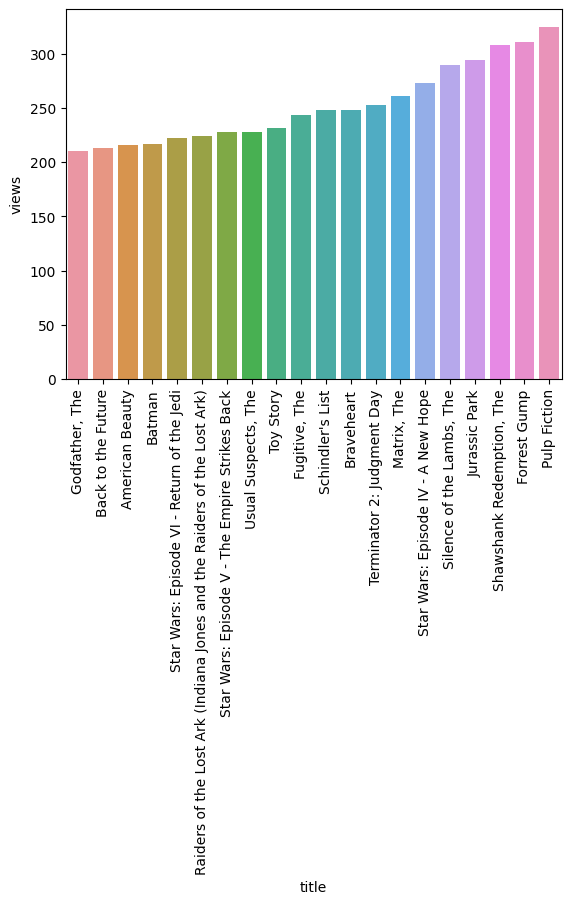

In [ ]:
# для топ 20 самых просматриваемых
import seaborn as sns
pic1 = sns.barplot(x=v['title'], y=v['views'])
pic1.set_xticklabels(labels=v['title'], rotation=90)
pic1

# Построение рекомендательных систем

Построим 3 типа рекомендательной системы:
* Контентная фильтрация (основывается на потребленном контенте)
* Коллаборативная фильтрация (учится на опыте других пользователей со схожими интересами).
* Cистема, основанной на знаниях (рекомендации строятся на основе экспертного мнения, неперсонализированная).

## 1. Контентная фильтрация

In [ ]:
# т.к. данный тип фильтрации основывается на потребленном контенте,
# создадим датафрэйм users, в котором будет отображена информация о каждом пользователе

# А именно:
# идентификатор пользователя, просмотренные фильмы и фильмы, оценённые выше 3

In [ ]:
users = pd.DataFrame({'user_Id': ratings.userId.unique()})
movies_watched = []
for u in ratings.userId.unique():
  movies_watched.append(np.array(ratings.sort_values(by='rating')[ratings.sort_values(by='rating').userId == u]['movieId']))
  # дополнительно сортирую фрэйм по рейтингу, чтобы в дальнейшем отбирать фильмы наиболее понравившиеся пользователю

users['movies_watched'] = movies_watched 

In [ ]:
r_good = ratings.sort_values(by='rating')[ratings.sort_values(by='rating').rating > 3]
good_rated_movies = []
for u in ratings.userId.unique():
  good_rated_movies.append(np.array(r_good[r_good.userId == u]['movieId']))

users['good_rated_movies'] = good_rated_movies

In [ ]:
users

,user_Id,movies_watched,good_rated_movies
0,1,"[45950, 57949, 256, 277, 204, 719, 2161, 2105,...","[4085, 4963, 5445, 6711, 5378, 1243, 1580, 161..."
1,2,"[784, 3, 112, 25, 32, 637, 5, 260, 95, 79, 58,...","[260, 95, 79, 58, 52, 14, 376, 494, 1356, 1073..."
2,3,"[348, 281, 292, 339, 377, 380, 410, 349, 350, ...","[144, 39, 36, 11, 150, 232, 277, 300, 613, 595..."
3,4,"[2683, 2713, 2723, 1732, 2828, 2724, 2759, 287...","[3260, 2969, 2935, 2874, 2848, 2770, 2763, 276..."
4,5,"[592, 1012, 500, 2427, 2490, 231, 110, 5065, 3...","[2762, 3616, 5481, 32017, 6377, 44193, 4890, 5..."
...,...,...,...
663,664,"[88405, 73017, 2657, 70286, 6377, 1214, 480, 6...","[6539, 68099, 750, 587, 780, 165, 1197, 57640,..."
664,665,"[48043, 45728, 4036, 55995, 54775, 55232, 5830...","[6058, 6377, 6870, 6942, 7347, 33679, 1573, 35..."
665,666,"[2188, 1911, 2581, 2568, 1623, 2555, 2629, 248...","[757, 589, 1270, 1288, 1617, 1773, 1127, 1148,..."
666,667,"[509, 3646, 2424, 2683, 2338, 145, 367, 7318, ...","[344, 500, 785, 1407, 1527, 1580, 1997, 2003, ..."


In [ ]:
# Теперь посмотрим насколько фильмы "похожи" между собой
# составим матрицу с косинусными расстояниями

# каждый фильм будет обозначаться вектором (жанры (0,1); количество просмотров; средний рейтинг, год выпуска)

In [ ]:
# нормализируем столбцы year, views и mean_rating
from sklearn import preprocessing
movies_norm = movies.drop(['title', 'genres'], axis = 1)
movies_norm.year = preprocessing.normalize([movies_norm.year])[0]
movies_norm.views = preprocessing.normalize([movies_norm.views])[0]
movies_mean_rating = preprocessing.normalize([movies_norm.mean_rating])[0]
movies_norm

,movieId,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,views,mean_rating
0,1,0.009865,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091302,3.907328
1,2,0.009865,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036206,3.353261
2,3,0.009865,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022826,3.189655
3,4,0.009865,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.004329,2.818182
4,5,0.009865,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024400,3.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,146656,0.009964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000787,3.500000
10324,146684,0.009964,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000394,4.000000
10325,146878,0.009722,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000394,2.500000
10326,148238,0.009964,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000394,3.000000


In [ ]:
from scipy import spatial
#result = 1 - spatial.distance.cosine(List1, List2)

mov_sim_mat = pd.DataFrame(index = movies_norm.movieId)
for m1 in np.array(movies_norm):
  m2 = np.array(movies_norm.drop(['movieId'], axis = 1))
  distances = m2.dot(m1[1:])/ (np.linalg.norm(m2, axis=1) * np.linalg.norm(m1[1:]))
  mov_sim_mat[int(m1[0])] = distances
# 1 мин 8 сек

In [ ]:
#mov_sim_mat = mov_sim_mat.replace(1, 0)
for i in mov_sim_mat:
  mov_sim_mat[i][i] = 0

In [ ]:
mov_sim_mat

,1,2,3,4,5,6,7,8,9,10,...,143385,143882,144482,144656,144976,146656,146684,146878,148238,148626
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.947653,0.857038,0.806448,0.894809,0.798737,0.861258,0.922643,0.819475,0.837738,...,0.827834,0.240682,0.751495,0.834363,0.784913,0.834366,0.949150,0.888166,0.893449,0.845532
2,0.947653,0.000000,0.812231,0.756923,0.849196,0.817665,0.819696,0.963755,0.838979,0.866965,...,0.847568,0.246420,0.769411,0.854254,0.803624,0.854255,0.876069,0.824894,0.842846,0.865687
3,0.857038,0.812231,0.000000,0.952111,0.958037,0.841301,0.999774,0.852916,0.863256,0.823785,...,0.872103,0.253553,0.791683,0.878983,0.826887,0.878984,0.904637,0.955213,0.957875,0.890746
4,0.806448,0.756923,0.952111,0.000000,0.903173,0.784011,0.950932,0.794884,0.804508,0.767672,...,0.876854,0.403989,0.825086,0.902227,0.770626,0.902228,0.851164,0.903297,0.903836,0.898116
5,0.894809,0.849196,0.958037,0.903173,0.000000,0.879589,0.962012,0.891729,0.902541,0.861276,...,0.911789,0.265091,0.827710,0.918982,0.864515,0.918983,0.944527,0.996614,0.999705,0.931281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146656,0.834366,0.854255,0.878984,0.902228,0.918983,0.884827,0.887069,0.897110,0.907968,0.866382,...,0.975533,0.419074,0.912010,1.000000,0.869732,0.000000,0.882356,0.892753,0.912182,0.998674
146684,0.949150,0.876069,0.904637,0.851164,0.944527,0.844464,0.909189,0.914564,0.866549,0.826860,...,0.875449,0.254522,0.794721,0.882356,0.830058,0.882356,0.000000,0.937231,0.943119,0.894163
146878,0.888166,0.824894,0.955213,0.903297,0.996614,0.854415,0.957896,0.866277,0.876762,0.836604,...,0.885765,0.257527,0.804086,0.892753,0.839840,0.892753,0.937231,0.000000,0.998274,0.904699


In [ ]:
#@title  "Обучение" модели 
# подбор топ-n значений для пользователя
# смотрим какие фильмы пользователь оценил выше всех и подбираем топ-n наиболее похожих (по матрице косинусного сходства)
y = []

for i in np.array(users):
  k = []
  n = 0
  while len(k) < 10:
    n += 1
    for m in i[2]:
      f = mov_sim_mat[m].sort_values().index[-n]
      if f not in i[1]:
        k.append(f)
      if len(k) == 10:
        break
      # идем по столбцу good_rated_movies; если значений меньше 10, проходим ещё несколько раз, пока не наберётся 10
      # Также проверяю, чтобы рекомендованные фильмы ещё не были просмотрены (строка 13)
  y.append(k)
# 18 сек

In [ ]:
y

[[8370, 8207, 1909, 898, 46530, 3174, 87192, 1252, 1127, 96737],
 [1196, 434, 6281, 916, 3261, 3185, 227, 1722, 8644, 1028],
 [8376, 2706, 5989, 2248, 97938, 5902, 3498, 1954, 301, 81847],
 [3451, 2570, 8809, 1380, 7181, 88, 5418, 85736, 2307, 8623],
 [3798, 3614, 3617, 97836, 117851, 51084, 69606, 81564, 5508, 47124],
 [55269, 1127, 1177, 5481, 117851, 3089, 48780, 247, 4241, 62],
 [1079, 5219, 82169, 2560, 1213, 318, 370, 4958, 8376, 71484],
 [1129, 2289, 6155, 46, 48412, 3897, 1196, 91658, 146, 3946],
 [2918, 6867, 7560, 97938, 1357, 1466, 6874, 2470, 1196, 96737],
 [3969, 2096, 74510, 48696, 64969, 31, 2324, 6063, 81932, 6440],
 [2502, 3776, 86190, 74740, 1777, 64614, 2660, 60816, 3527, 551],
 [6261, 2791, 2671, 1183, 4571, 5768, 4993, 3108, 34143, 551],
 [6665, 7317, 72701, 3635, 3758, 3911, 7007, 5033, 98361, 3984],
 [2051, 8644, 1129, 4886, 1028, 296, 441, 4995, 4477, 6333],
 [1953, 4096, 60816, 84395, 103574, 2263, 3421, 4980, 3798, 3202],
 [1021, 5666, 2431, 2353, 1127, 8810, 

In [ ]:
len(y), users.shape

(668, (668, 3))

In [ ]:
# Рекомендательная система :
rec1 = pd.DataFrame({'user_id': users.user_Id, 'recommended films': y})
rec1

,user_id,recommended films
0,1,"[8370, 8207, 1909, 898, 46530, 3174, 87192, 12..."
1,2,"[1196, 434, 6281, 916, 3261, 3185, 227, 1722, ..."
2,3,"[8376, 2706, 5989, 2248, 97938, 5902, 3498, 19..."
3,4,"[3451, 2570, 8809, 1380, 7181, 88, 5418, 85736..."
4,5,"[3798, 3614, 3617, 97836, 117851, 51084, 69606..."
...,...,...
663,664,"[3740, 44421, 4349, 5666, 1129, 288, 53140, 10..."
664,665,"[96815, 117851, 5291, 69757, 6476, 552, 1589, ..."
665,666,"[375, 96737, 84772, 1252, 105366, 1374, 79091,..."
666,667,"[719, 2431, 2770, 86295, 8633, 87192, 3476, 84..."


In [ ]:
# т.о. на вход подаётся строчка характеризующая пользователя (просмотренные фильмы и наиболее понравившиеся из них)
# для проверки возьмём первую строчку
user_1 = users.loc[0]
k = []
movie_title = []
n = 0
while len(k) < 10:
  n += 1
  for m in user_1[2]:
    f = mov_sim_mat[m].sort_values().index[-n]
    if f not in user_1[1]:
      k.append(f)
      movie_title.append(movies[movies.movieId==f].title.item())
    if len(k) == 10:
      break
print(k)
print(movie_title)

[8370, 8207, 1909, 898, 46530, 3174, 87192, 1252, 1127, 96737]
['Blind Swordsman: Zatoichi, The (Zatôichi)', 'Day of the Jackal, The', 'X-Files: Fight the Future, The', 'Philadelphia Story, The', 'Superman Returns', 'Man on the Moon', 'Attack the Block', 'Chinatown', 'Abyss, The', 'Dredd']


In [ ]:
def content_prediction(user):
  movie_title = []
  n = 0
  while len(movie_title) < 10:
    n += 1
    for m in user[2]:
      f = mov_sim_mat[m].sort_values().index[-n]
      if f not in user[1]:
        movie_title.append(movies[movies.movieId==f].title.item())
      if len(movie_title) == 10:
        break
  return(movie_title)
content_prediction(user_1)

['Blind Swordsman: Zatoichi, The (Zatôichi)',
 'Day of the Jackal, The',
 'X-Files: Fight the Future, The',
 'Philadelphia Story, The',
 'Superman Returns',
 'Man on the Moon',
 'Attack the Block',
 'Chinatown',
 'Abyss, The',
 'Dredd']

## Коллаборативная фильтрация

In [ ]:
# Коллаборативная фильтрация (учится на опыте других пользователей со схожими интересами)

In [ ]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [ ]:
# создадим матрицу user-movie, в которой будет записана информация об оценке i-го фильма j-м пользователем
# На её основе расчитаем матрицу близости для пользователей
rating_matrix = pd.DataFrame(index = ratings.userId.unique(), columns = sorted(ratings.movieId.unique()))

for i in ratings.iloc:
  rating_matrix[i['movieId']][i['userId']] = i['rating']
# 28 сек  

In [ ]:
rating_matrix = rating_matrix.replace(np.NaN, 0)

In [ ]:
rating_matrix

,1,2,3,4,5,6,7,8,9,10,...,143882,144482,144656,144976,146344,146656,146684,146878,148238,148626
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rating_matrix.describe()

,1,2,3,4,5,6,7,8,9,10,...,143882,144482,144656,144976,146344,146656,146684,146878,148238,148626
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,1.357036,0.461826,0.276946,0.046407,0.301647,0.701347,0.278443,0.016467,0.098802,0.727545,...,0.000749,0.004491,0.005240,0.008982,0.002994,0.010479,0.005988,0.003743,0.004491,0.019461
std,1.924200,1.191409,0.937528,0.377519,0.978378,1.573139,0.959221,0.247382,0.552328,1.483246,...,0.019346,0.116073,0.135419,0.166299,0.077382,0.193317,0.154765,0.096728,0.116073,0.290393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,...,0.500000,3.000000,3.500000,3.500000,2.000000,4.000000,4.000000,2.500000,3.000000,4.500000


In [ ]:
# матрица близости для пользователей
from sklearn.metrics.pairwise import pairwise_distances
user_sim_mat = pairwise_distances(rating_matrix, metric='cosine')

# user_sim_mat = pd.DataFrame(index = rating_matrix.index)
# for m1 in np.array(rating_matrix):
#   m2 = np.array(rating_matrix)
#   distances = m2.dot(m1)/ (np.linalg.norm(m2, axis=1) * np.linalg.norm(m1))
#   user_sim_mat[int(m1[0])] = distances
# user_sim_mat = user_sim_mat.replace(1, 0)

In [ ]:
pd.DataFrame(user_sim_mat).head(3)

,0,1,2,3,4,5,6,7,8,9,...,658,659,660,661,662,663,664,665,666,667
0,0.000000,0.898887,0.789956,0.871234,0.942104,0.922870,0.641910,0.902566,0.760811,0.973337,...,0.708838,0.855259,0.893417,0.908951,0.763195,0.845481,0.754929,0.761340,0.721783,0.846499
1,0.898887,0.000000,0.884441,0.965390,0.967295,0.971695,0.937086,0.528082,0.805768,1.000000,...,0.931675,1.000000,0.522670,0.853113,0.836447,0.938263,0.949052,0.948577,0.964093,0.935175
2,0.789956,0.884441,0.000000,0.941792,0.955574,0.987184,0.915478,0.933380,0.540297,0.931546,...,0.847922,0.698979,0.918374,0.901051,0.689766,0.920548,0.907179,0.919060,0.841057,0.890336


In [ ]:
user_sim_mat.shape

(668, 668)

In [ ]:
# Берём исходного пользователя
# Находим группу пользователей, которая максимально похожа на него, и узнаём, какие фильмы понравились этой группе.
# Нашему исходному пользователю рекомендуем фильмы, которые нравятся найденной группе пользователей.
# На входе пользователь, на выходе – рекомендация фильмов для данного пользователя.

In [ ]:
# выбираем группы по 5 наиболее похожих пользователей
# У каждого пользователя из подобранной группы выбираем по 2 наиболее высоко оценённых фильма
# И проверяем чтобы выбранные фильмы не были просмотренны тем пользователем, для которого составляется рекомендация
y2 = []
for i in np.array(rating_matrix.index):
  sim_users = pd.DataFrame(user_sim_mat[i-1], index = rating_matrix.index).sort_values(0)[-5:].index # отбор пользователей с похожими предпочтениями
  suit_mov = []
  for u in sim_users:
    n = 0
    for m in users[users.user_Id == u]['good_rated_movies'].item():
      if m not in users[users.user_Id == i]['movies_watched'].item():
        suit_mov.append(m)
        n += 1
      if n==2:
        break
  y2.append(suit_mov)
# 5 сек

In [ ]:
y2

[[543, 163, 2395, 485, 5577, 6624, 4214, 6367, 25801, 3911],
 [1172, 3000, 5312, 493, 6773, 3255, 5481, 5505, 5051, 4886],
 [1959, 1968, 3148, 173, 25801, 3911, 3163, 5095, 89864, 89492],
 [7022, 4728, 552, 588, 48394, 40815, 134130, 112852, 480, 59315],
 [1101, 1080, 543, 163, 2969, 17, 2770, 44, 1465, 1617],
 [592, 71, 593, 592, 16, 18, 1514, 1305, 593, 457],
 [915, 914, 1464, 2746, 1, 34, 7022, 4728, 25801, 3911],
 [3448, 2916, 296, 318, 172, 1207, 5481, 5505, 115210, 134170],
 [1617, 1612, 25801, 3911, 1464, 2746, 2572, 2109, 2072, 90647],
 [911, 933, 348, 461, 2387, 2490, 58, 175, 4973, 5690],
 [69757, 58559, 89864, 89492, 1465, 1617, 115210, 134170, 2072, 90647],
 [48780, 48774, 1449, 1283, 4011, 4878, 21, 11, 7022, 4728],
 [480, 59315, 8341, 8524, 552, 588, 780, 786, 1614, 1537],
 [44195, 1848, 2572, 2109, 1282, 1674, 2002, 2329, 69122, 116823],
 [2126, 2170, 1380, 1307, 6365, 3752, 3578, 3719, 261, 900],
 [115210, 134170, 69757, 2581, 56367, 1895, 2021, 1734, 2572, 2109],
 [257

In [ ]:
len(y2)

668

In [ ]:
# Рекомендательная система :
rec2 = pd.DataFrame({'user_id': users.user_Id, 'recommended films': y2})
rec2

,user_id,recommended films
0,1,"[543, 163, 2395, 485, 5577, 6624, 4214, 6367, ..."
1,2,"[1172, 3000, 5312, 493, 6773, 3255, 5481, 5505..."
2,3,"[1959, 1968, 3148, 173, 25801, 3911, 3163, 509..."
3,4,"[7022, 4728, 552, 588, 48394, 40815, 134130, 1..."
4,5,"[1101, 1080, 543, 163, 2969, 17, 2770, 44, 146..."
...,...,...
663,664,"[355, 596, 2019, 1233, 2770, 44, 86548, 93510,..."
664,665,"[2550, 2391, 2395, 485, 543, 163, 256, 70361, ..."
665,666,"[25, 742, 432, 494, 543, 1234, 837, 7325, 494, 1]"
666,667,"[2944, 2717, 1584, 1183, 5577, 6624, 3751, 311..."


In [ ]:
# т.о. на вход подаётся user_Id
# для проверки возьмём первую строчку
user_1 = users.loc[0].user_Id
movie_title = []
n = 0
sim_users = pd.DataFrame(user_sim_mat[user_1-1], index = rating_matrix.index).sort_values(0)[-5:].index # отбор пользователей с похожими предпочтениями
suit_mov = []
for u in sim_users:
  n = 0
  for m in users[users.user_Id == u]['good_rated_movies'].item():
    if m not in users[users.user_Id == user_1]['movies_watched'].item():
      suit_mov.append(m)
      movie_title.append(movies[movies.movieId == m]['title'].item())
      n += 1
    if n==2:
      break
print(suit_mov)
print(movie_title)

[543, 163, 2395, 485, 5577, 6624, 4214, 6367, 25801, 3911]
['So I Married an Axe Murderer', 'Desperado', 'Rushmore', 'Last Action Hero', 'Igby Goes Down', 'Agent Cody Banks', 'Revenge of the Nerds', 'Down with Love', 'She Done Him Wrong', 'Best in Show']


In [ ]:
def collaborative_prediction(user_id):
  movie_title = []
  n = 0
  sim_users = pd.DataFrame(user_sim_mat[user_id-1], index = rating_matrix.index).sort_values(0)[-5:].index # отбор пользователей с похожими предпочтениями
  suit_mov = []
  for u in sim_users:
    n = 0
    for m in users[users.user_Id == u]['good_rated_movies'].item():
      if m not in users[users.user_Id == user_1]['movies_watched'].item():
        suit_mov.append(m)
        movie_title.append(movies[movies.movieId == m]['title'].item())
        n += 1
      if n==2:
        break
  return movie_title
collaborative_prediction(user_1)

['So I Married an Axe Murderer',
 'Desperado',
 'Rushmore',
 'Last Action Hero',
 'Igby Goes Down',
 'Agent Cody Banks',
 'Revenge of the Nerds',
 'Down with Love',
 'She Done Him Wrong',
 'Best in Show']

## Cистема, основанная на знаниях

Основным преимуществом рекомендательных систем, основанных на знаниях, является отсутствие проблем с холодным запуском (разгон). Соответствующим недостатком является потенциальное узкое место в получении знаний , вызванное необходимостью явным образом определить рекомендательные знания.

In [ ]:
# Cистема, основанной на знаниях (рекомендации строятся на основе экспертного мнения, неперсонализированная).
# То есть нужно сделать некоторый рейтинг всех фильмов
# и предлагать первые топ-n значений

In [ ]:
# т.к. жанр фильма нельзя оценить по какой-то шкале, 
# возьмём количество просмотров и средний рейтинг фильма
rat = movies[['title','views','mean_rating']]
rat['views'] = rat['views']*(1/max(rat['views']))
rat['mean_rating'] = rat['mean_rating']*(1/max(rat['mean_rating']))

#нормируем значения от 0 до 1, чтобы их вес был одинаков
# и составляем рейтинг на основе суммы этих признаков

In [ ]:
rat

,title,views,mean_rating
0,Toy Story,0.713846,0.781466
1,Jumanji,0.283077,0.670652
2,Grumpier Old Men,0.178462,0.637931
3,Waiting to Exhale,0.033846,0.563636
4,Father of the Bride Part II,0.190769,0.650000
...,...,...,...
10323,Creed,0.006154,0.700000
10324,Cosmic Scrat-tastrophe,0.003077,0.800000
10325,Le Grand Restaurant,0.003077,0.500000
10326,A Very Murray Christmas,0.003077,0.600000


In [ ]:
rat['summ'] = rat['views'] + rat['mean_rating']

In [ ]:
rat = rat.sort_values('summ', ascending=False)
rat = rat['title']
rat

279                             Shawshank Redemption, The
260                                          Pulp Fiction
316                                          Forrest Gump
525                             Silence of the Lambs, The
230                    Star Wars: Episode IV - A New Hope
                               ...                       
9819                        Jackass Presents: Bad Grandpa
5795                               Early Summer (Bakushû)
5262     Intolerance: Love's Struggle Throughout the Ages
7439                                     Bratz: The Movie
10195                                      Johnny Express
Name: title, Length: 10321, dtype: object

In [ ]:
recommended = [*rat[:10]]
recommended

['Shawshank Redemption, The',
 'Pulp Fiction',
 'Forrest Gump',
 'Silence of the Lambs, The',
 'Star Wars: Episode IV - A New Hope',
 'Matrix, The',
 'Jurassic Park',
 "Schindler's List",
 'Braveheart',
 'Terminator 2: Judgment Day']

# Обобщения

In [ ]:
# Т.о. 3 вида фильтрации дали разные результаты
# Первые 2 - персонализированные, последняя - нет

In [ ]:
# Контентная фильтрация:
rec1

,user_id,recommended films
0,1,"[8370, 8207, 1909, 898, 46530, 3174, 87192, 12..."
1,2,"[1196, 434, 6281, 916, 3261, 3185, 227, 1722, ..."
2,3,"[8376, 2706, 5989, 2248, 97938, 5902, 3498, 19..."
3,4,"[3451, 2570, 8809, 1380, 7181, 88, 5418, 85736..."
4,5,"[3798, 3614, 3617, 97836, 117851, 51084, 69606..."
...,...,...
663,664,"[3740, 44421, 4349, 5666, 1129, 288, 53140, 10..."
664,665,"[96815, 117851, 5291, 69757, 6476, 552, 1589, ..."
665,666,"[375, 96737, 84772, 1252, 105366, 1374, 79091,..."
666,667,"[719, 2431, 2770, 86295, 8633, 87192, 3476, 84..."


In [ ]:
# Коллаборативная фильтрация
rec2

,user_id,recommended films
0,1,"[543, 163, 2395, 485, 5577, 6624, 4214, 6367, ..."
1,2,"[1172, 3000, 5312, 493, 6773, 3255, 5481, 5505..."
2,3,"[1959, 1968, 3148, 173, 25801, 3911, 3163, 509..."
3,4,"[7022, 4728, 552, 588, 48394, 40815, 134130, 1..."
4,5,"[1101, 1080, 543, 163, 2969, 17, 2770, 44, 146..."
...,...,...
663,664,"[355, 596, 2019, 1233, 2770, 44, 86548, 93510,..."
664,665,"[2550, 2391, 2395, 485, 543, 163, 256, 70361, ..."
665,666,"[25, 742, 432, 494, 543, 1234, 837, 7325, 494, 1]"
666,667,"[2944, 2717, 1584, 1183, 5577, 6624, 3751, 311..."


In [ ]:
recommended

['Shawshank Redemption, The',
 'Pulp Fiction',
 'Forrest Gump',
 'Silence of the Lambs, The',
 'Star Wars: Episode IV - A New Hope',
 'Matrix, The',
 'Jurassic Park',
 "Schindler's List",
 'Braveheart',
 'Terminator 2: Judgment Day']

In [ ]:
# немного переделаем функцию контентной фильтрации, чтобы все функции принимали на вход одинаковые значения
def content_prediction(user_id):
  user = np.array(users[users.user_Id == user_id])[0]
  movie_title = []
  n = 0
  while len(movie_title) < 10:
    n += 1
    for m in user[2]:
      f = mov_sim_mat[m].sort_values().index[-n]
      if f not in user[1]:
        movie_title.append(movies[movies.movieId==f].title.item())
      if len(movie_title) == 10:
        break
  return(movie_title)

In [ ]:
# Посмотрим результвты разных фильтраций для конкретного пользователя
# Допустим с id = 30
user_id = 30
content_prediction(user_id)

['Seconds',
 'Fox and the Hound, The',
 'Underworld: Awakening',
 'Librarian: Quest for the Spear, The',
 'Here Comes Mr. Jordan',
 'Mary Poppins',
 'Catch-22',
 'Abyss, The',
 'Anastasia',
 'Life Is Beautiful (La Vita è bella)']

In [ ]:
collaborative_prediction(user_id)

['Oliver Twist',
 'High and the Mighty, The',
 'Dark Water (Honogurai mizu no soko kara)',
 'Battle Royale (Batoru rowaiaru)',
 'Addams Family Values',
 'My Fair Lady',
 '10 Things I Hate About You',
 'Jerk, The',
 'Contact',
 'English Patient, The']

In [ ]:
recommended

['Shawshank Redemption, The',
 'Pulp Fiction',
 'Forrest Gump',
 'Silence of the Lambs, The',
 'Star Wars: Episode IV - A New Hope',
 'Matrix, The',
 'Jurassic Park',
 "Schindler's List",
 'Braveheart',
 'Terminator 2: Judgment Day']

## Гибридная рекомендательная система

In [ ]:
type(collaborative_prediction(user_id))

list

In [ ]:
# Создадаим гибридную рекомендательную систему, 
# которая будет выбирать 10 рандомных значений из результатов других фильтраций
def hybrid_filtering(user_id):
  f = content_prediction(user_id) + collaborative_prediction(user_id) + recommended
  import random
  top10 = random.sample(f, 10)
  return top10

hybrid_filtering(user_id)

['Abyss, The',
 'Seconds',
 'Forrest Gump',
 'Underworld: Awakening',
 'Silence of the Lambs, The',
 'Catch-22',
 'Life Is Beautiful (La Vita è bella)',
 'Jurassic Park',
 'Librarian: Quest for the Spear, The',
 'Anastasia']

# Заметки 2

## Обучение модели

In [ ]:
# Т.к. курсовая работа по машинному обучению и обязательными пунктами являются 
# * Разделение набора данных на обучающую и тестовую выборки
# и
# * визуализация результатов моделирования,

# нужно создать модель, признаками которой будут рейтинги фильмов, предпочтения пользователей,
# она должна анализировать степень близости пользователей и фильмов и на выходе выдавать n самых подходящих вариантов
# КАК????????

In [ ]:
# Идея: разделим пользователей на группы (проведём кластеризацию), 
# для каждой группы определим 20 наиболее подходящих фильмов и будем их предлагать любому пользователю,
# попавшему в конкретную группу (либо можно провести коллаборативную фильтрацию, но внутри групп)

# Т.е. необходимо провести кластеризацию, а затем классификацию пользователей
# и модель будет предсказывать не фильмы, а группу, в которую вероятно попадает пользователь

In [ ]:
# для этого разделим выборку на тестовую и обучающую
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(rating_matrix, test_size=0.2, random_state=45)

In [ ]:
X_test

,1,2,3,4,5,6,7,8,9,10,...,143882,144482,144656,144976,146344,146656,146684,146878,148238,148626
196,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,143882,144482,144656,144976,146344,146656,146684,146878,148238,148626
640,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,4.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545,0.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
644,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = rating_matrix

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
# Возьмём кол-во кластеров равным 100, т.к. объём выборки немного больше 500, 
# а для моего алгоритма фильтрации нужно 5 ближайших пользователей
#(не факт, что в каждом классе получится по 5 объектов, но  )
kmeans = KMeans(n_clusters = 50, random_state=0, n_init="auto").fit(X)

In [ ]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 50,
 'n_init': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
y_train = kmeans.predict(X_train)
y_test = kmeans.predict(X_test)
y = kmeans.predict(rating_matrix)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
#Обучим созданную модель на имеющихся у нас данных:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_train)

In [ ]:
print(f"Training score: {logistic.score(X_train, y_train):.4f}")
print(f"Test score: {logistic.score(X_test, y_test):.4f}")
# достаточно высокий уровень эффективности

Training score: 1.0000
Test score: 0.7836


In [ ]:
# построим кривые обучения
# from yellowbrick.model_selection import LearningCurve
# visualizer = LearningCurve(
#     LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
# # ).fit(X, y).show() 


# Очень долго выполняется(

In [ ]:
#Метод опорных векторов
from sklearn import svm
clf = svm.SVC() # С гауссовым ядром
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [ ]:
print(f"Training score: {clf.score(X_train, y_train):.4f}")
print(f"Test score: {clf.score(X_test, y_test):.4f}")

Training score: 0.9719
Test score: 0.7985


In [ ]:
# Посмотрим с сигмоидным
s_svc = svm.SVC(kernel='sigmoid')
s_svc.fit(X_train, y_train)
print(f"Training score: {s_svc.score(X_train, y_train):.4f}")
print(f"Test score: {s_svc.score(X_test, y_test):.4f}")

# показатели стали лучше, промежуток между тестовой и обучающей эффективностью очень маленький, при этом точность высокая

Training score: 0.9120
Test score: 0.7985


In [ ]:
# воспользуемся классификатором на основе гребневой регрессии
from sklearn.linear_model import RidgeClassifier
gr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {gr.score(X_train, y_train):.4f}")
print(f"Test score: {gr.score(X_test, y_test):.4f}")

# значение регуляризации очень большое => модель недообучена

Training score: 0.3464
Test score: 0.3731


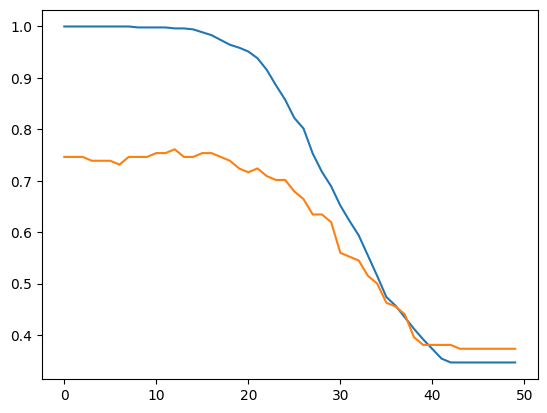

In [ ]:
# построим график зависимости эффективности модели от значения параметра регуляризации и определим оптимальный
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [ ]:
trains[28], np.logspace(2, 6, 50)[28]

(0.7172284644194756, 19306.977288832495)

In [ ]:
gr = RidgeClassifier(alpha=19307).fit(X_train, y_train)

print(f"Training score: {gr.score(X_train, y_train):.4f}")
print(f"Test score: {gr.score(X_test, y_test):.4f}")

Training score: 0.7172
Test score: 0.6343


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


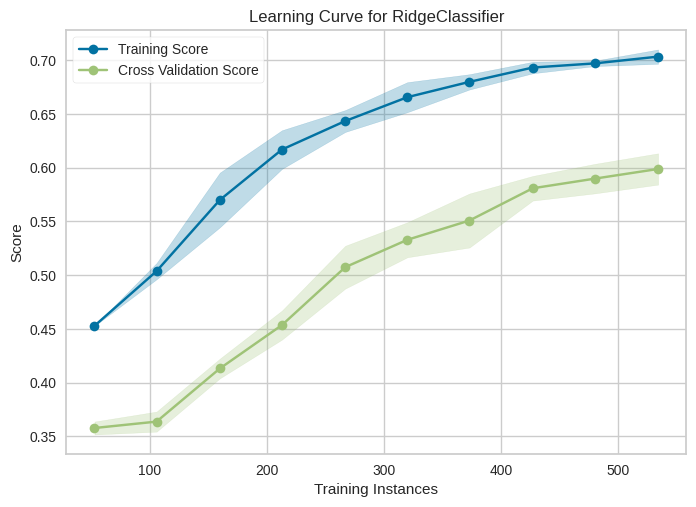

In [ ]:
# Построим кривые обучения для модели гребневой регрессии
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    RidgeClassifier(alpha=19307), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

In [ ]:
# Метод ближайших соседей
from sklearn.neighbors import NearestNeighbors
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(3, weights=weights)
    clf.fit(X_train, y_train)
    print(clf.score(X_train,y_train), clf.score(X_test,y_test), '\n')

0.651685393258427 0.5895522388059702 

1.0 0.582089552238806 



In [ ]:
from collections import Counter
from sklearn import metrics
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def distance(self, a, b):
      return np.sqrt(np.sum((a - b)**2))
    
    def _predict(self, x):
        distances = [self.distance(x, x_train) for x_train in self.X_train]
        distances = list(enumerate(distances))
        distances.sort(key=lambda elem: elem[1])
        indicies = [idx for idx, _ in distances]
        neighbors = [self.y_train[i] for i in indicies[:self.k]]
        most_common = Counter(neighbors).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        y_pred = [self._predict(x) for x in np.array(X)]
        return np.array(y_pred)

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def score(self, X, y):
      m = metrics.confusion_matrix(y, self.predict(X))
      s = 0
      for i in range(len(m)):
        s += m[i][i]
      return s/X.shape[0]
NN = KNN()
NN.fit(X_train,y_train)
print(f"Training score: {NN.score(X_train,y_train):.4f}")
print(f"Test score: {NN.score(X_test,y_test):.4f}")

Training score: 0.6966
Test score: 0.5821


In [ ]:
# Многослойный перцептрон
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X_train, y_train)
print(f"Training score: {clf.score(X_train, y_train):.4f}")
print(f"Test score: {clf.score(X_test, y_test):.4f}")

Training score: 1.0000
Test score: 0.5299


In [ ]:
# Дерево решений
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print(f"Training score: {clf.score(X_train, y_train):.4f}")
print(f"Test score: {clf.score(X_test, y_test):.4f}")

Training score: 1.0000
Test score: 0.5597


In [ ]:
# Наивный байесовский классификатор
# Наивный байесовский классификатор - модель, основанная на применении формулы Байеса.
# Этот метод полагается на предположение о независимости признаков.
from sklearn.naive_bayes import GaussianNB
clf_b = GaussianNB()
clf_b.fit(X_train, y_train)
print(f"Training score: {clf_b.score(X_train, y_train):.4f}")
print(f"Test score: {clf_b.score(X_test, y_test):.4f}")

Training score: 0.9906
Test score: 0.4030


In [ ]:
# Пассивно-агрессивный классификатор
from sklearn.linear_model import PassiveAggressiveClassifier
clf_agr = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
clf_agr.fit(X_train, y_train)
print(f"Training score: {clf_agr.score(X_train, y_train):.4f}")
print(f"Test score: {clf_agr.score(X_test, y_test):.4f}")

Training score: 1.0000
Test score: 0.6194


In [ ]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.4457
Test score: 0.4328


In [ ]:
# Беггинг
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)
clf.fit(X_train, y_train)
print(f"Training score: {clf.score(X_train, y_train):.4f}")
print(f"Test score: {clf.score(X_test, y_test):.4f}")

Training score: 0.0019
Test score: 0.0000


In [ ]:
def classifications():
  types = [svm.SVC(),svm.SVC(kernel = 'sigmoid'),KNN(),Perceptron(), DecisionTreeClassifier(random_state=0),GaussianNB(),
           PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3),RidgeClassifier(),
           RandomForestClassifier(max_depth=2, random_state=0),BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)]
  names = ['Метод опорных векторов', ' Метод опорных векторов с сигмоидным ядром','Метод ближайших соседей','Многослойный перцептрон','Дерево решений',
           'Наивный байесовский классификатор','Пассивно-агрессивный классификатор',
           'Гребневый классификатор','Случайный лес','Беггинг']
  n = len(types)           
  for i in range(n):
    model = types[i]
    model.fit(X_train, y_train)
    print(f'{names[i]:<25}: {round(model.score(X_train,y_train),3)} {round(model.score(X_test,y_test),3)}')

print('метод','Training_score','Test_score')
classifications() 

метод Training_score Test_score
Метод опорных векторов   : 0.972 0.799
 Метод опорных векторов с сигмоидным ядром: 0.912 0.799
Метод ближайших соседей  : 0.697 0.582
Многослойный перцептрон  : 1.0 0.53
Дерево решений           : 1.0 0.56
Наивный байесовский классификатор: 0.991 0.403
Пассивно-агрессивный классификатор: 1.0 0.619
Гребневый классификатор  : 1.0 0.716
Случайный лес            : 0.446 0.433
Беггинг                  : 0.002 0.0


In [ ]:
 # Метод опорных векторов с сигмоидным ядром имеет самые высокие метрики (промежуток между тестовой и обучающей эффективностью очень маленький, 
 # при этом точность высокая)
 # Значит воспользуемся данным методом

In [ ]:
model = svm.SVC(kernel = 'sigmoid')
model.fit(X_train, y_train)
y_pr_train = model.predict(X_train)
y_pr_test = model.predict(X_test)

In [ ]:
y_pr_test

array([29, 29, 20, 29, 20, 20, 29,  2, 20,  2, 20,  2, 20, 20,  6,  2, 20,
       20, 20, 29,  2, 16, 20, 29,  2, 20, 16, 20,  2, 20, 36, 20,  6,  2,
       16, 20, 29, 20, 16, 20, 36, 20, 20, 20, 20, 16, 20,  2,  2, 20, 36,
       29, 20, 20, 36, 20,  2, 36, 20, 16, 29, 20, 20, 20, 20, 16, 29, 20,
        2, 20, 20, 20, 29,  6, 20,  2, 20, 16, 20, 29, 20, 16, 16, 20, 16,
        2, 16, 20, 29, 16, 20, 29, 20,  6, 29, 36, 36, 20, 36,  2, 29, 16,
        2, 29, 20, 20,  2, 29, 36, 20, 29, 20,  6, 20, 20, 20,  2, 29, 20,
        2, 36, 20, 29,  2,  6, 20, 20,  6, 20, 29, 29, 20, 16, 20],
      dtype=int32)

In [ ]:
# Теперб сформируем для каждой группы подборку фильмов
# и соотнесём рандомные 10 из этой подборки с пользователями

In [ ]:
y_pr = model.predict(X)

In [ ]:
classif = pd.DataFrame({'user_id':X.index, 'group':y_pr})
classif

,user_id,group
0,1,16
1,2,6
2,3,29
3,4,36
4,5,20
...,...,...
663,664,20
664,665,16
665,666,36
666,667,20


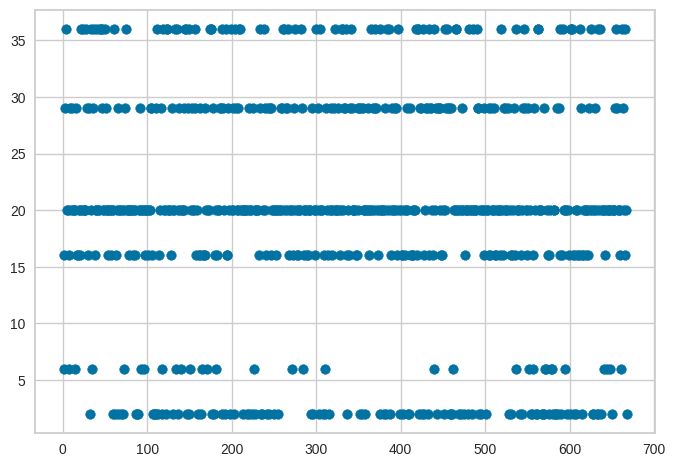

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(classif.user_id, classif.group)

In [ ]:
# видим, что выделены только 6 основных классов
# попробуем разбить на 6
kmeans = KMeans(n_clusters = 6, random_state=0, n_init="auto").fit(X)
y_train = kmeans.predict(X_train)
y_test = kmeans.predict(X_test)
y = kmeans.predict(rating_matrix)
classifications() 

Метод опорных векторов   : 1.0 0.881
 Метод опорных векторов с сигмоидным ядром: 0.951 0.91
Метод ближайших соседей  : 0.757 0.739
Многослойный перцептрон  : 1.0 0.731
Дерево решений           : 1.0 0.791
Наивный байесовский классификатор: 0.996 0.381
Пассивно-агрессивный классификатор: 1.0 0.746
Гребневый классификатор  : 1.0 0.858
Случайный лес            : 0.734 0.739
Беггинг                  : 0.015 0.0


In [ ]:
# Видим улучшение метрик, в особенности метода опорных векторов, также выбираем его
model = svm.SVC(kernel = 'sigmoid')
model.fit(X_train, y_train)
y_pr_train = model.predict(X_train)
y_pr_test = model.predict(X_test)
y_pr = model.predict(X)
classif = pd.DataFrame({'user_id':X.index, 'group':y_pr})
classif

,user_id,group
0,1,5
1,2,2
2,3,2
3,4,2
4,5,2
...,...,...
663,664,2
664,665,5
665,666,5
666,667,2


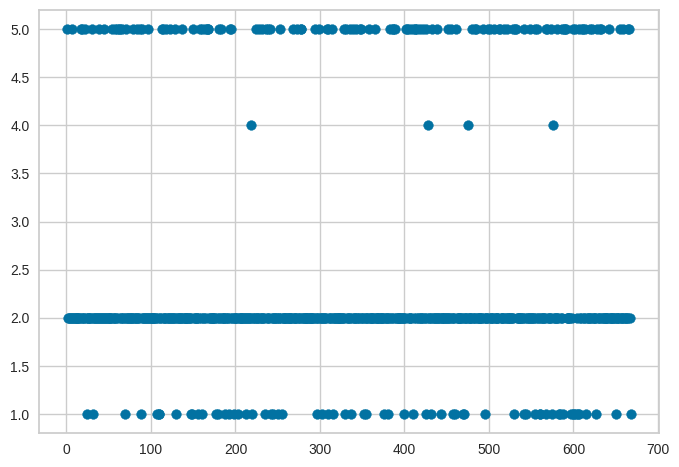

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(classif.user_id, classif.group)

In [ ]:
# Но, всё-таки для предсказания фильмов, лучше, чтобы рекомендации складывались из тех,
# которые смотрят наиболее близкие по интересам пользователи
# Поэтому оставим кол-во классов равное 50
kmeans = KMeans(n_clusters = 50, random_state=0, n_init="auto").fit(X)
y_train = kmeans.predict(X_train)
y_test = kmeans.predict(X_test)
y = kmeans.predict(rating_matrix)
model = svm.SVC(kernel = 'sigmoid')
model.fit(X_train, y_train)
y_pr_train = model.predict(X_train)
y_pr_test = model.predict(X_test)
y_pr = model.predict(X)
classif = pd.DataFrame({'user_id':X.index, 'group':y_pr})

In [ ]:
classif

,user_id,group
0,1,16
1,2,6
2,3,29
3,4,36
4,5,20
...,...,...
663,664,20
664,665,16
665,666,36
666,667,20


In [ ]:
classes = classif.group.unique()
classes
# Всё равно видим, что кол-во классов = 6

array([16,  6, 29, 36, 20,  2], dtype=int32)

In [ ]:
import random
class_recs = []
for i in classes:
  rec = []
  for u in classif[classif.group == i]['user_id']:
    rec.append(hybrid_filtering(u))
  class_recs.append(random.sample(rec, 10)[0])

In [ ]:
recs = pd.DataFrame({'group': classes, 'recommendations': class_recs})

In [ ]:
classif.merge(recs, on = 'group').sort_values('user_id')

,user_id,group,recommendations
0,1,16,"[Lost Highway, All About My Mother (Todo sobre..."
94,2,6,"[Shawshank Redemption, The, X-Men: Days of Fut..."
126,3,29,"[Me, Myself & Irene, Star Wars: Episode IV - A..."
233,4,36,"[Hidden, The, Revenge of the Nerds, Black Hole..."
315,5,20,"[Matrix, The, Rock, The, Murder at 1600, Gone ..."
...,...,...,...
563,664,20,"[Matrix, The, Rock, The, Murder at 1600, Gone ..."
93,665,16,"[Lost Highway, All About My Mother (Todo sobre..."
314,666,36,"[Hidden, The, Revenge of the Nerds, Black Hole..."
564,667,20,"[Matrix, The, Rock, The, Murder at 1600, Gone ..."
